## Multiclass classification
### One-hot encoding
Asumamosos imagenes de tres animales: gatos, perros, cerdos. Podemos usar vectoress en vez de escalares de la siguiente forma:

$$y^{(1)} = (1, 0 , 0) \quad \text{para un gato} $$
$$y^{(2)} = (0, 1 , 0) \quad \text{para un perro} $$
$$y^{(3)} = (0, 0 , 1) \quad \text{para un cerdo} $$

En este caso la matriz $Y$ deja de ser un vector $y$ para convertirse en una matriz de $3x3$.
En este caso:

$X \in \mathbb{R}^{m \times n}$, $\Theta \in \mathbb{R}^{n \times K}$, 
$Y=X \Theta \in \mathbb{R}^{m \times K}$. 

### Uno contra el resto:
La idea aca es separar los datos en dos grupos. Un grupo con las etiquetas $i$ y el otro con el resto $1,2, \cdots, i-1, i+1, \cdots, m$.


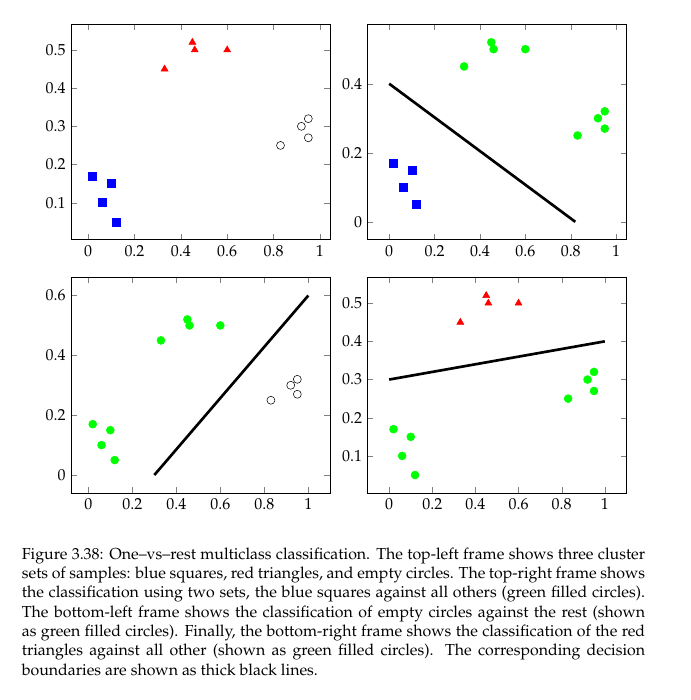

En la grafica de arriba tenemos tres clases $K=3$, cuadrados azules, circulos vacios y triangulos rojos. Inicialmente escogemos los cuadrados azules contra el resto que la figura son circulos verdes, aca se obtiene una hipotesis $h_1(\Theta, X)$, Luego se escogen los circulos vacios contra el resto (inferior izquierda) y se obtiene otra hipotesis $h_2(\Theta, x)$, finalmente se escogen los triangulos rojos contra el resto, inferior derecha. Aca se halla otra hipotesis $h_3(\Theta, X)$. Luego se toma una muestra nueva, la hipotesis para esta muestra nueva es:

$$ h(\Theta, x) = \max_{i=1}^3 h_i(\Theta, x) $$

En general para $K$ grupos se tiene que:

$$ h(\Theta, x) = \max_{i=1}^K h_i(\Theta, x) $$


## Frontera de decision (Decision Boundary).

Que es la frontera de decision?

Comencemos simple. La hipotesis para regresion logistica la definimos como

$$h(\theta, x^{(i)}) = S(x^{(i)} \theta) = \frac{1}{1 + \mathrm{e}^{-x^{(i)} \theta}} $$. Esta es continua en $x$ y  $\theta$.

Habiamos dicho que esta representaba una probabilidad $p(y=1 | x^{(i)}; \theta)$. Y que como solo teniamos dos opciones $Y=1, Y=0$ definimos una hipotesis discreta basada en un umbra $\gamma$ ($\gamma=0.5$ en general) Esta es:

$$ h_{binaria} = \left \{
    \begin{array}{cc}
    1 & \text{si }  S(x^{(i)} \theta) > \gamma \\
    0 & \text{de lo contrario} 
    \end{array} 
 \right . $$

 

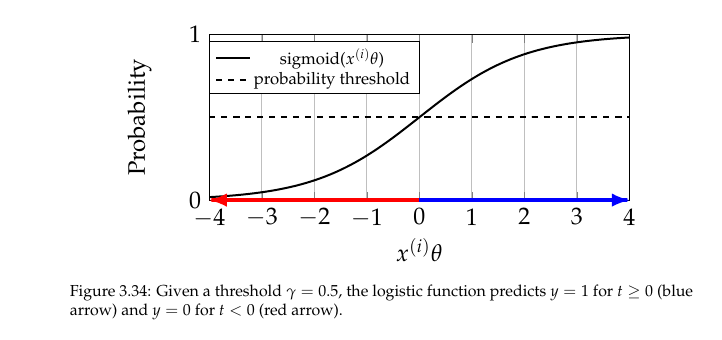

Para $\gamma=0.5$ la decicion esta en S(x^{(i)} \theta= u)=1/2$, $u=0$.
Pero que es 

$$ f(x^{(i)}) = x^{(i)} \theta = 0$$. Esta funcion es un plano.

En el dominio $x^{i)}$ esto es un punto en una dimension, $x^{(i)}=0$, 
una recta en dos dimensiones $x^{(i)} \theta=0$, $x_1^{(i)} \theta_1 + \theta_0=0$, para $x^{(i)} \in \mathbb{R}^3$ la ecuacion es la de un plano.

$\theta_0 + \theta_1 x_1^{(i)} + \theta_2 x_2^{(i)} = 0$. 

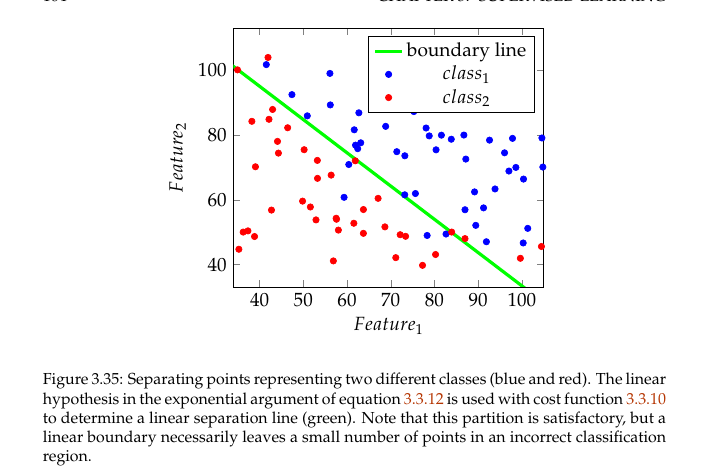

Cuando no existe un hiperplano que separe los puntos en dos grupos (con un error minimo) decimoso que el conjunto no es separable linealmente.

Que se hace cuando el conjunto no es separable linealmente?

Se cambia el argumento de la hipotesis. Hasta este punto el argumento es
$x^{(i)} \theta$, pero ahora podemos pensar en argumentos mas generales.
En la tarea para la proxima semana vamos a usar un polinomio de grado 8 en dos variables.

La hipotesis es:

$$  h(\theta , x ) = S( g(\theta, X))$$

donde

$$ g(\theta, X) = \sum_{i=0}^8 \sum_{j=0}^i \theta_{[ i(i+1)/2 + j ]} x_2^j x_1^{i-j}$$
Este es un polinomio en dos variables de grado $8$. 

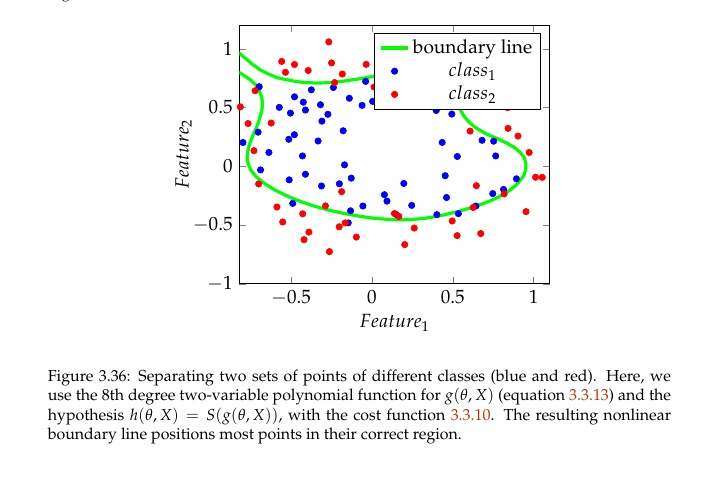

Se puede usar regularizacion. Y obtenemos.
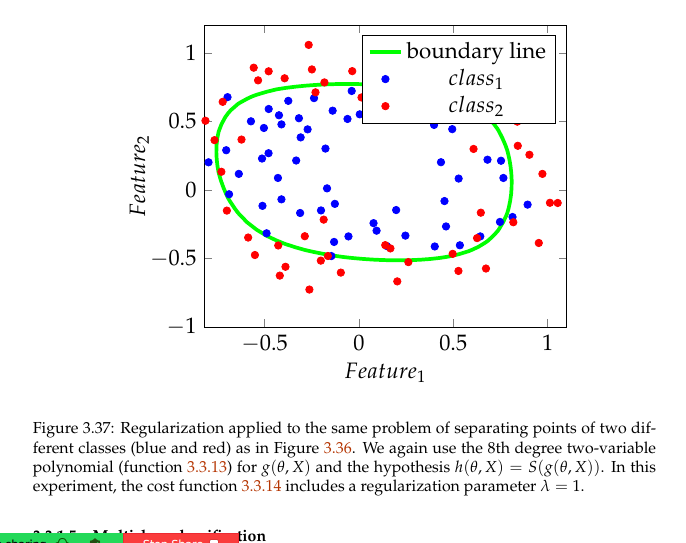

Cuales son los pasos para encontrar la frontera de desicion:

1. Definir el modelo de la frontera. Si es lineal $x^{(i)} \theta = 0$, o igual a otro numero si $\gamma \ne 1/2$, $S^{(-1)}(\gamma)$. En general el modelo es del tipo $g(\theta, X)$. En la tarea $g$ es un polinomio en dos variables $(x_1, x_2)$ de grado $8$. 

2. Entrenar el sistema:
    *  Obtener la funcion de costo
    * Obtener el gradiente de la funcion de costo
    * iterar con un metodo de gradiente.

3. De aca sale $\theta$, y luego hace grafica de $g(\theta, x)$ como funcion $x$. 




## Analisis de la precision en la clasificacion
Analyzing classification accuracy.
accuracy= exactitud?
precision=precision?

8:50 am?

Debemos tener herramientas para medir el grado de precision de los modelos obtenidos en machine learning.

Hablemos de la matriz de **confusion**.



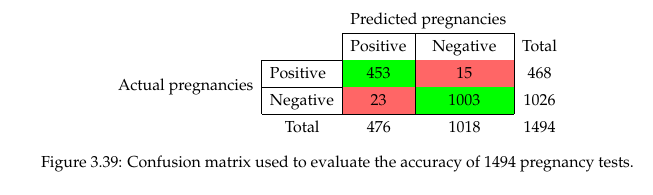

La matriz de confusion, para un caso binario (el caso de $K>2$ lo vemos mas adelante) es una matriz de $2 \times 2$ donde se registran las pruebas positivas y negativas , reales versus estimadas. 

La matriz de confusion sirve para evaluar la efectividad del modelo.

La matriz de confusion la notamos aca como $L$ y las componentes son $\ell_{ij}$ donde

* $\ell_{11}$: se conoce como TP=(True Positives) (positivos verdaderos PV). En ejemplo de la matriz de arriba son 453 mujeres.

* $\ell_{12}$: se conoce como FN, 15 en la matriz de arriba. 
* $\ell_{21}$: FP : false positive (falsos positivos). 
* $\ell_{22}$: TN : verdadero negativo.

El numero total de muestras es $m=TP + TN + FP + FN$.

Vamos a definir algunas metricas para estimar el modelo.

**accuracy** (exactitud):
Es la fraccion entre todos los aciertos con respecto al total. 

$$ \text{accuracy} = \frac{TP  + TN}{m} $$

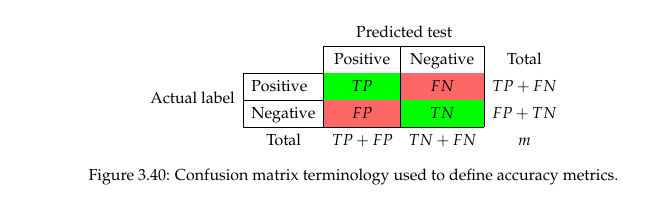

\begin{eqnarray}
\begin{pmatrix}
3 & 5 \\
2 & 8
\end{pmatrix}
\end{eqnarray}

Por que no es suficiente con el "accuracy" para juzgar modelos.

Veamos primero un ejemplo en Python

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0]
y_pred = [0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]

# segun el manual
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(f"tn={tn}, fp={fp}, fn={fn}, tp={tp}")

tn=3, fp=3, fn=2, tp=4


Ejemplos:
* Un instituto de investigacion quiere aprender acerca del diagostico de diabetes en sus pacientes. Usan el signo "+" para los positivos, "-" para los negativos. Existen 4 posibilidades. 
En los simbolos XY: Y es la prediccion y X es lo real
    * TP: La prediccion es positiva para un paciente diabetico. El resultado  bueno aunque para el paciente es desastroso.
    * TN: Se predice que no tiene diabetes "-", pero en realidad no la tiene. Es lo mejor que le puede pasar al paciente.
    * FP : Se predice que la tiene, pero no la tiene. Usted deja de comer azuar sin necsitad. Es malo pero no tanto como el que viene
    * FN: Predique que no la tiene y si la tiene. Se va a comer azucar sin medida atentando contra salud. Piense, por ejemplo, en el caso de cancer. Pensando que no tiene cancer se relaja y al tiempo le aparece una metastasis. Esto es lo peor que pueda pasar.

* Un algoritmo de ML en su servidor de email detecta cuando un email es spam o cuando no. Se tienen las siguientes posibilidades:
    * TP: El email se predice como "spam" y es "spam". Pa'la basura.
    * TN: Se predice como legitimo "-" y no es "spam". Esto es bueno
    * FP: Se predice como "spam" y no es "spam". Este es el peor escenario para un servidor de mensajes. Piense un un mensaje de un cliente de suma importancia y que se vaya al contenedor de basura. Y se pierda un gran negocio. Le puede costar su puesto de trabajo.
    * FN: Se predice como no spam y es spam. No es tan malo, lo borra manualmente. Lo que debe hacer, realmente, es marcarlo como "spam" para que el sistema "aprenda".

* Como ejemplo final. En este ejemplo $m=1$. Piense que le llego una carta diciendo que se gano un millon de dolares, pero que debe dar informacion bancaria para que le consigen.

Extisten las siguientes posibilidades:




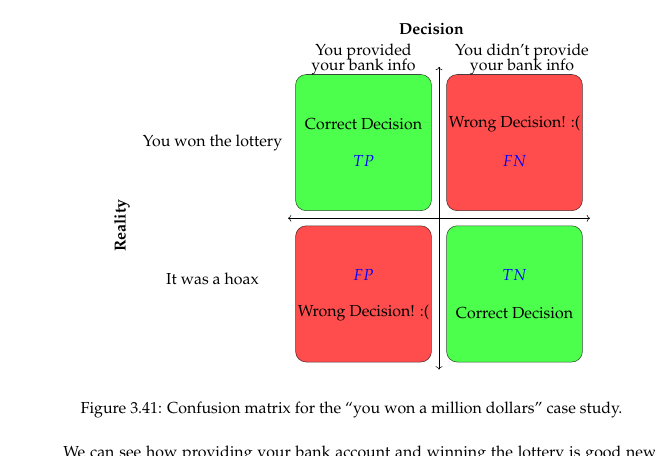

## Mas metricas de la matriz de confusion.
El complemento (lo contrario) a accuracy es **misclassification rate** (tasa de clasificacion errada). 

$$ \text{misclaficacion rate} = = 1 - \text{accuracy} = \frac{FP + FN}{m} $$

Considremos el siguiente ejemplo de spam email

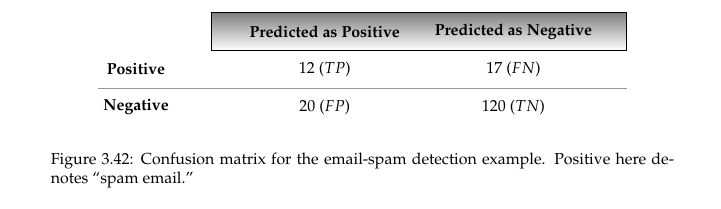

El "accuracy" (diagonal sobre el total) para este ejemplo es:

$$\text{accuracy} = \frac{12 + 120}{12+120+17+20} = 0.781  (78.1\%) $$

Veamos por que la exactitud (accuracy) no es la mejor medida. Asuma un servidor de email que precide que todos los correos son spam.

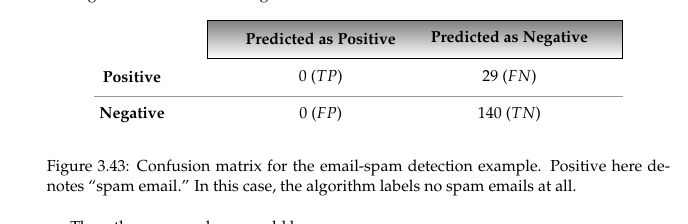

Calculemos el "accuracy" para este modelo

$$\text{accuracy} = \frac{149}{168} = 0.82 (82 \%) $$

**precision**: En este caso es la tasa de positivos correctos (TP) con respecto a los que se predicen como positivos.

$$ \text{precision} = \frac{TP}{TP + FP} $$.
Calculemos la precision en el ejemplo anterior.
(suma de la primera columna sobre el total)

0/0 ?

Al denominador se le suma una "basurita" y el resultado es 0.
En el ejemplo de mas arriba:

$$\text{precision} = 12/32 = 0.375 (37.5 \%) $$

**recall** : La precision nos dice acerca de los casos positivos predichos correctamente con respecto a los predichos como positivos. Ahora piense los que son TP con respecto a todos los positivos. Es TP con respecto a la suma de la primera fila de la matriz de confusion.

$$ \text{recall} = \frac{TP}{TP + FN} $$.




> Indented block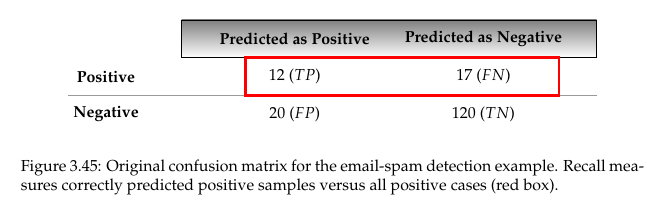



En el ejemplo de la figura

$$ \text{recall} = \frac{12}{29}=0.4138 (41.38 \%)$$ 

Si las componentes por fuera de la diagonal son 0, precision=accuracy=recall=1 .

La ultima metrica importante para el QC de clasificacion en ML.

La **AUC-ROC** (Area Under the Curve), ROC: Receiver Operating Characteristics. Esto se desarrollo durante la segunda guerra mundial.


La idea de ROC es una grafica parametrica de TPR contra FPR.

Se borro el TPR y el FPR (True Positive Rate), False Positive Rate.

La grafica es parametrica con respecto al parametro de umbral $\gamma$.


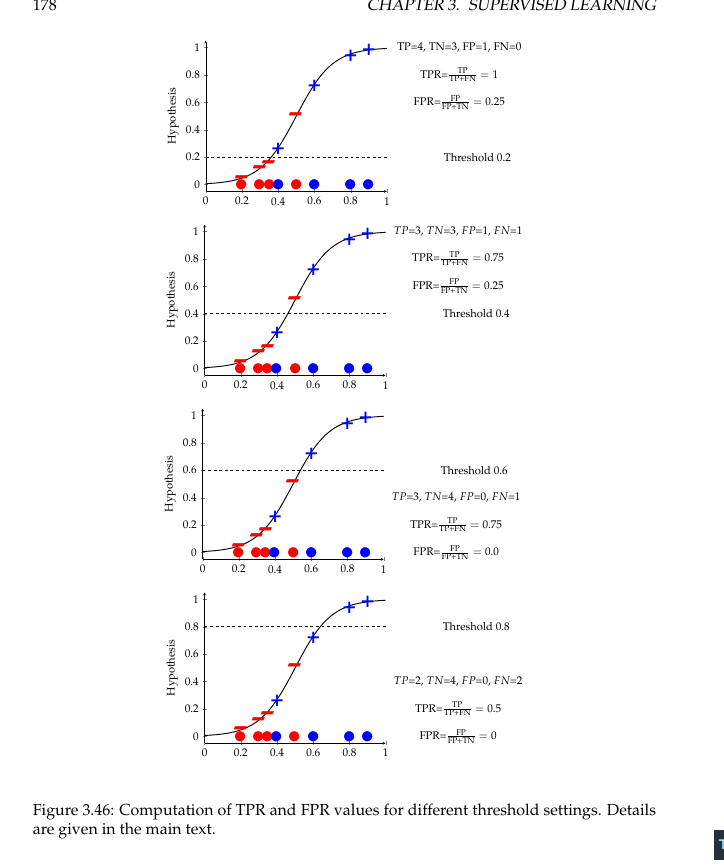

Cuando $\gamma=0$, $TP=4, FP=4, TN=0, FN=0$, entonces

$$TPR = \frac{TP}{TP + FN} = 4/4=1 $$
$$ FPR  = \frac{FP}{FP+ TN} = 1$.



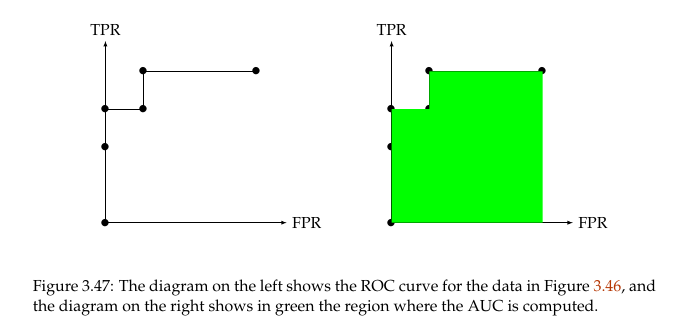

para $\gamma=1$, TP=0, TN=4, FP=0, FN=4

$$ TPR = \frac{TP}{TP + FN} = 0 $$
$$ FPR = \frac{FP}{FP+TN} = 0 $$

El area de la curva es

$$1 - 0.25^2 =0.9375 $$

$\gamma$ puede ser mucho mas pequeno y generar una curva menos pixelada.


El codigo  para esta curva esta a continuacion




/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


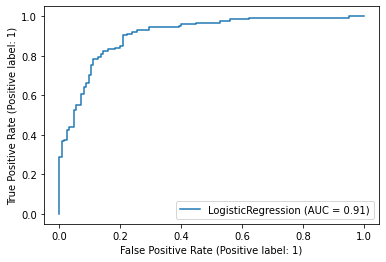

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection, datasets
from sklearn.datasets import make_classification

X, y = make_classification( random_state=1, n_samples=1000,
                           n_classes = 2)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, random_state=0
)

clf = LogisticRegression()
clf.fit(X_train, y_train)
w = metrics.plot_roc_curve(clf, X_test, y_test)






In [22]:
len(y_train)/len(y)

0.75

In [33]:
print(w)

In [34]:
dir(w)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ax_',
 'estimator_name',
 'figure_',
 'fpr',
 'from_estimator',
 'from_predictions',
 'line_',
 'plot',
 'pos_label',
 'roc_auc',
 'tpr']

In [39]:
w.tpr

array([0.   , 0.008, 0.288, 0.288, 0.368, 0.368, 0.376, 0.376, 0.424,
       0.424, 0.44 , 0.44 , 0.528, 0.528, 0.552, 0.552, 0.608, 0.608,
       0.64 , 0.64 , 0.664, 0.664, 0.704, 0.704, 0.752, 0.752, 0.784,
       0.784, 0.792, 0.792, 0.808, 0.808, 0.824, 0.824, 0.832, 0.832,
       0.84 , 0.84 , 0.848, 0.848, 0.904, 0.904, 0.912, 0.912, 0.92 ,
       0.92 , 0.928, 0.928, 0.944, 0.944, 0.952, 0.952, 0.96 , 0.96 ,
       0.968, 0.968, 0.976, 0.976, 0.984, 0.984, 0.992, 0.992, 1.   ,
       1.   ])

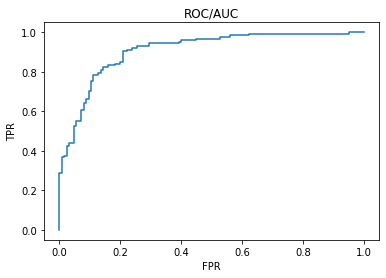

In [48]:
import matplotlib.pyplot as plt
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC/AUC")


plt.plot(w.fpr, w.tpr, label="AUC")
plt.legend=True

In [44]:
dir(w)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'ax_',
 'estimator_name',
 'figure_',
 'fpr',
 'from_estimator',
 'from_predictions',
 'line_',
 'plot',
 'pos_label',
 'roc_auc',
 'tpr']

In [45]:
w.roc_auc

0.907648